# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# --- fahrenheit units ---
units = "imperial"

# --- build partial query url for API call for fahrenheit data ---
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# --- create empty lists to hold required data ---
city_name = []
city_lats = []
city_lngs = []
city_temp = []
city_maxtemps = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
city_country = []
date = []

# --- initialize count variables for counting city and set ---
item = 1
batch = 1

# --- print initial header before displaying for loop  data ---
print("Beginning Data Retrieval")
print("----------------------------")

# --- for loop go through the list of cities and perform a request for data on each city ---
for city in cities:
    
    # --- build query url with city name ---
    query_url = base_url + city
    
    # --- get the response as json ---
    data = requests.get(query_url).json()
    
    # --- retrieve required data into lists using exception handling ---
    try:
        print(f"Processing Record {item} of Set {batch} | {city}")  
        city_name.append(data["name"])
        city_country.append(data["sys"]["country"])
        city_lats.append(data["coord"]["lat"])
        city_lngs.append(data["coord"]["lon"])    
        city_temp.append(data["main"]["temp"])
        city_maxtemps.append(data["main"]["temp_max"])
        city_humidity.append(data["main"]["humidity"])
        city_cloudiness.append(data["clouds"]["all"])
        city_windspeed.append(data["wind"]["speed"])
        date.append(data["dt"])
        
        # --- increase item count by 1 ---
        item += 1
        
        # --- if statement to limit API calls to 50 using time.sleep (openweathermap API limits calls to 60/minute) ---
        if item > 50:
            # --- start a new set of items ---
            batch += 1
            
            # --- reset item count to 1 for next set ---
            item = 1
            
            # --- delay the execution to stay within the limits of the API query ---
            time.sleep(1)
    
    except:
        print(f"City '{city}' not found. Skipping...")

# --- print completion header after displaying for loop  data ---
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | san patricio
Processing Record 5 of Set 1 | chapais
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | attawapiskat
City 'attawapiskat' not found. Skipping...
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | mackay
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | conceicao do araguaia
Processing Record 15 of Set 1 | shubarkuduk
Processing Record 16 of Set 1 | dingle
Processing Record 17 of Set 1 | rocha
Processing Record 18 of Set 1 | vanimo
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | urk
Processing Record 21 of Set 1 | mount i

Processing Record 20 of Set 4 | yellowknife
Processing Record 21 of Set 4 | nalut
Processing Record 22 of Set 4 | atar
Processing Record 23 of Set 4 | tessalit
Processing Record 24 of Set 4 | siocon
Processing Record 25 of Set 4 | gobabis
Processing Record 26 of Set 4 | ozgon
City 'ozgon' not found. Skipping...
Processing Record 26 of Set 4 | comodoro rivadavia
Processing Record 27 of Set 4 | huarmey
Processing Record 28 of Set 4 | berlevag
Processing Record 29 of Set 4 | makushino
Processing Record 30 of Set 4 | iqaluit
Processing Record 31 of Set 4 | labuhan
Processing Record 32 of Set 4 | tarakan
Processing Record 33 of Set 4 | leningradskiy
Processing Record 34 of Set 4 | kahului
Processing Record 35 of Set 4 | manzil tamim
City 'manzil tamim' not found. Skipping...
Processing Record 35 of Set 4 | bengkulu
Processing Record 36 of Set 4 | gizo
Processing Record 37 of Set 4 | katobu
Processing Record 38 of Set 4 | sira
Processing Record 39 of Set 4 | karaul
City 'karaul' not found. S

Processing Record 46 of Set 7 | kamaishi
Processing Record 47 of Set 7 | kushima
Processing Record 48 of Set 7 | klimovo
Processing Record 49 of Set 7 | arona
Processing Record 50 of Set 7 | pisco
Processing Record 1 of Set 8 | meridian
Processing Record 2 of Set 8 | guadix
Processing Record 3 of Set 8 | ingraj bazar
Processing Record 4 of Set 8 | sabang
Processing Record 5 of Set 8 | bonthe
Processing Record 6 of Set 8 | pastavy
Processing Record 7 of Set 8 | davila
Processing Record 8 of Set 8 | kagoro
Processing Record 9 of Set 8 | greymouth
Processing Record 10 of Set 8 | sambava
Processing Record 11 of Set 8 | carman
Processing Record 12 of Set 8 | cayambe
Processing Record 13 of Set 8 | yar-sale
Processing Record 14 of Set 8 | freeport
Processing Record 15 of Set 8 | husavik
Processing Record 16 of Set 8 | rafaela
Processing Record 17 of Set 8 | san quintin
Processing Record 18 of Set 8 | port lincoln
Processing Record 19 of Set 8 | nizhneyansk
City 'nizhneyansk' not found. Skipp

Processing Record 23 of Set 11 | nisia floresta
Processing Record 24 of Set 11 | mezen
Processing Record 25 of Set 11 | matiari
Processing Record 26 of Set 11 | banda aceh
Processing Record 27 of Set 11 | gigmoto
Processing Record 28 of Set 11 | yinchuan
Processing Record 29 of Set 11 | pevek
Processing Record 30 of Set 11 | romanovka
Processing Record 31 of Set 11 | yablonovo
Processing Record 32 of Set 11 | oranjemund
Processing Record 33 of Set 11 | cesme
Processing Record 34 of Set 11 | lichinga
Processing Record 35 of Set 11 | jackson
Processing Record 36 of Set 11 | naze
Processing Record 37 of Set 11 | kolyvan
Processing Record 38 of Set 11 | fort nelson
Processing Record 39 of Set 11 | kuvshinovo
Processing Record 40 of Set 11 | canutama
Processing Record 41 of Set 11 | aleksandrovsk-sakhalinskiy
Processing Record 42 of Set 11 | mahaicony
City 'mahaicony' not found. Skipping...
Processing Record 42 of Set 11 | seydi
Processing Record 43 of Set 11 | uddevalla
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# --- create a dataframe with retrieved data ---
cities_temps_df = pd.DataFrame({"City": city_name,
                                "Country": city_country,
                                "Date": date,
                                "Lat": city_lats,
                                "Lng": city_lngs,
                                "Max Temp (F)": city_maxtemps,
                                "Humidity (%)": city_humidity,
                                "Cloudiness (%)": city_cloudiness,
                                "Wind Speed (mph)": city_windspeed,
                                })

# --- convert unix timestamp under date column to date,time using pd.to_datetime ---
cities_temps_df["Date"] = pd.to_datetime(cities_temps_df["Date"], unit = "s")

# --- save the dataframe to .csv file ---
cities_temps_df.to_csv("../output_data/cities.csv", index=True, index_label="City ID", header=True)

# --- display the dataframe ---
cities_temps_df

,City,Country,Date,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Ushuaia,AR,2022-12-28 04:00:47,-54.8000,-68.3000,40.66,75,75,26.46
1,Rikitea,PF,2022-12-28 04:00:47,-23.1203,-134.9692,78.22,73,24,10.27
2,Butaritari,KI,2022-12-28 04:00:48,3.0707,172.7902,80.04,82,67,15.66
3,San Patricio,US,2022-12-28 04:00:48,28.0170,-97.5169,46.08,79,30,5.70
4,Chapais,CA,2022-12-28 03:55:49,49.7834,-74.8492,-9.62,100,65,3.67
...,...,...,...,...,...,...,...,...,...
580,Puyo,EC,2022-12-28 04:00:47,-1.4667,-77.9833,64.27,82,25,3.87
581,Juruti,BR,2022-12-28 04:03:55,-2.1522,-56.0922,72.61,97,100,2.33
582,Ilula,TZ,2022-12-28 04:03:56,-7.6766,36.0366,61.47,95,94,1.05
583,Simbahan,PH,2022-12-28 04:03:56,6.3032,120.5836,80.28,80,100,10.16


In [17]:
# Display DataFrame
cities_temps_df.head()

,City,Country,Date,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Ushuaia,AR,2022-12-28 04:00:47,-54.8000,-68.3000,40.66,75,75,26.46
1,Rikitea,PF,2022-12-28 04:00:47,-23.1203,-134.9692,78.22,73,24,10.27
2,Butaritari,KI,2022-12-28 04:00:48,3.0707,172.7902,80.04,82,67,15.66
3,San Patricio,US,2022-12-28 04:00:48,28.0170,-97.5169,46.08,79,30,5.70
4,Chapais,CA,2022-12-28 03:55:49,49.7834,-74.8492,-9.62,100,65,3.67


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
# --- find cities that have humidity over 100% ---
humidity_over_100 = cities_temps_df.loc[cities_temps_df["Humidity (%)"] > 100, :]

if humidity_over_100.empty == True:
    print("There are no cities with humidity values over 100%")

There are no cities with humidity values over 100%
Using original dataframe to continue with plotting...


In [20]:
#  Get the indices of cities that have humidity over 100%.
Humidityover100Index = humidity_over_100.index

In [21]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
  # --- create a clean DataFrame by dropping all humidity outliers by index found above ---
clean_city_data = cities_temps_df.drop(Humidityover100Index).reset_index(drop=True)
clean_city_data.head()
    
    # --- extract relevant fields from the data frame for plotting ---
latitudes = clean_city_data["Lat"]
temperatures = clean_city_data["Max Temp (F)"]
humidity = clean_city_data["Humidity (%)"]
cloudiness = clean_city_data["Cloudiness (%)"]
windspeed = clean_city_data["Wind Speed (mph)"]

    # --- export the new dataframe into a csv ---
clean_city_data.to_csv("../output_data/clean_city_data.csv", index=True, index_label="City ID", header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

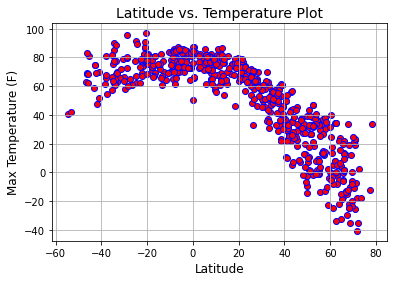

In [29]:
plt.scatter(latitudes, temperatures, marker="o", facecolors="red", edgecolors="blue")

# --- add labels, title, limits & grid ---
plt.title("Latitude vs. Temperature Plot", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-temp.png")
plt.show()

## Latitude vs. Humidity Plot

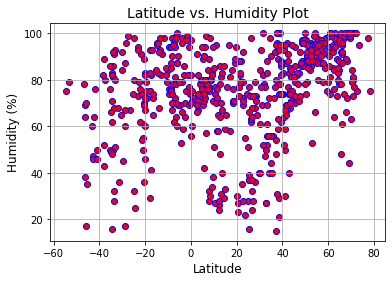

In [30]:
# --- create a scatter plot depicting latitude vs humidity ---
plt.scatter(latitudes, humidity, marker="o", facecolors="red", edgecolors="blue")

# --- add labels, title, limits & grid ---
plt.title("Latitude vs. Humidity Plot", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

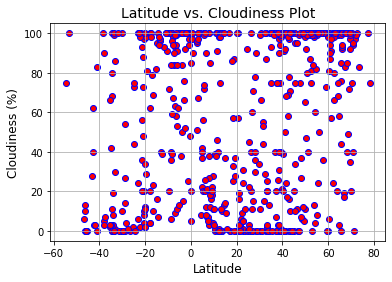

In [31]:
# --- create a scatter plot depicting latitude vs cloudiness ---
plt.scatter(latitudes, cloudiness, marker="o", facecolors="red", edgecolors="blue")

# --- add labels, title, limits & grid ---
plt.title("Latitude vs. Cloudiness Plot", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

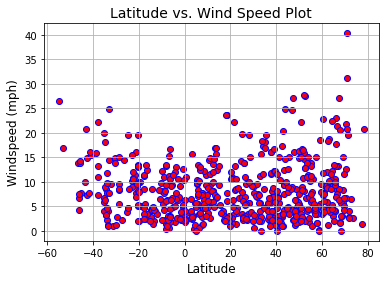

In [32]:
# --- create a scatter plot depicting latitude vs wind speed ---
plt.scatter(latitudes, windspeed, marker="o", facecolors="red", edgecolors="blue")

# --- add labels, title, limits & grid ---
plt.title("Latitude vs. Wind Speed Plot", fontsize=14)
plt.ylabel("Windspeed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-windspeed.png")
plt.show()

## Linear Regression

In [33]:
def plot_linear_regression(x, y, ax=None, **kwargs):
    
    # --- use the axes specified ---
    ax = ax
    
    # --- get linear regression values and store in variables ---
    slope, intercept, rvalue, pvalue, stderror = linregress(x,y)
    print(f"Linear Regression Completed...")    
    print(f"The R Squared is: {rvalue**2}")

    # y = m * x + b
    regress_values = slope * x + intercept
    
    #create line equation 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
                                                          
    # --- plot the linear model ---
    ax.plot(x, regress_values, color="firebrick")
    
    #return the plot and line equation created ---
    return ax, line_eq

# Create Northern and Southern Hemisphere DataFrames
# --- find and store rows for Northern Hemisphere dataframe 
if humidity_over_100.empty == True:
    northern_hemisphere = cities_temps_df.loc[cities_temps_df["Lat"] >= 0, :].copy().reset_index(drop=True)
else:
    northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0, :].copy().reset_index(drop=True)
    

#find and store rows for Southern Hemisphere dataframe 
if humidity_over_100.empty == True:
    southern_hemisphere = cities_temps_df.loc[cities_temps_df["Lat"] < 0, :].copy().reset_index(drop=True)
else:
    southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0, :].copy().reset_index(drop=True)    

# --- extract relevant fields from both data frames for plotting ---
north_latitudes = northern_hemisphere["Lat"]
north_temperatures = northern_hemisphere["Max Temp (F)"]
north_humidity = northern_hemisphere["Humidity (%)"]
north_cloudiness = northern_hemisphere["Cloudiness (%)"]
north_windspeed = northern_hemisphere["Wind Speed (mph)"]

south_latitudes = southern_hemisphere["Lat"]
south_temperatures = southern_hemisphere["Max Temp (F)"]
south_humidity = southern_hemisphere["Humidity (%)"]
south_cloudiness = southern_hemisphere["Cloudiness (%)"]
south_windspeed = southern_hemisphere["Wind Speed (mph)"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.7873633931058488


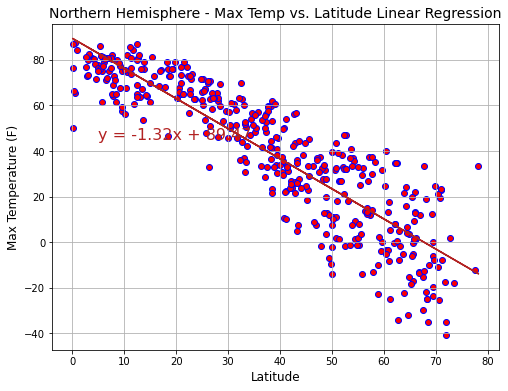

In [34]:
# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_temperatures, marker="o", facecolors="red", edgecolors="blue")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(north_latitudes, north_temperatures, ax)

# --- add labels, title, limits & grid ---
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(5,45),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/northern-latitude-vs-temp-linreg.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.18879613506426696


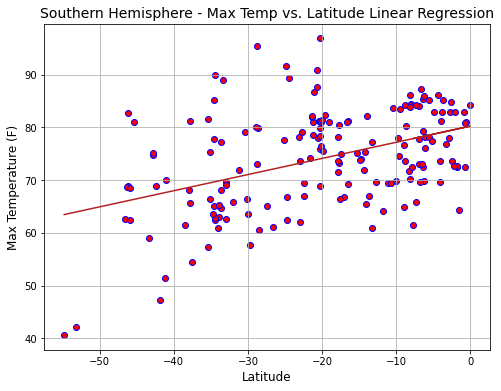

In [35]:
# create scatter plot
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_temperatures, marker="o", facecolors="red", edgecolors="blue")

#call linear regression plot function to retrieve plot and line equation (for annotation) 
ax, line_eq = plot_linear_regression(south_latitudes, south_temperatures, ax)

# --- add labels, title, limits & grid ---
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(-25, 35),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/southern-latitude-vs-temp-linreg.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.17548345964172282


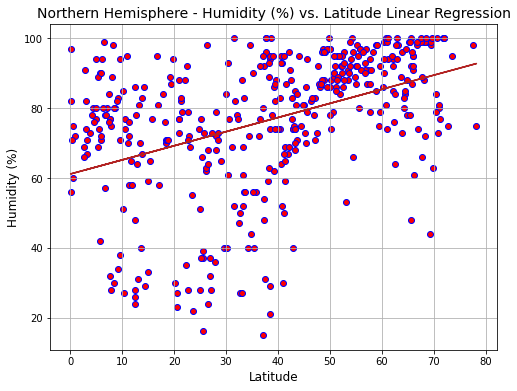

In [36]:
#create scatter plot 
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_humidity, marker="o", facecolors="red", edgecolors="blue")

#call linear regression plot function to retrieve plot and line equation (for annotation) 
ax, line_eq = plot_linear_regression(north_latitudes, north_humidity, ax)

#add labels, title, limits & grid 
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(50,10),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/northern-latitude-vs-humidity-linreg.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.16436535327245858


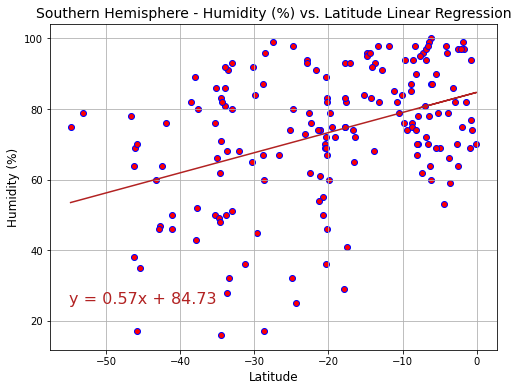

In [37]:
#create scatter plot
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_humidity, marker="o", facecolors="red", edgecolors="blue")

#call linear regression plot function to retrieve plot and line equation (for annotation) 
ax, line_eq = plot_linear_regression(south_latitudes, south_humidity, ax)

#add labels, title, limits & grid
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

#annotate the linear regression line equation on the plot
plt.annotate(line_eq,(-55, 25),fontsize=16,color="firebrick")

#display and save the plot
plt.savefig("../Images/southern-latitude-vs-humidity-linreg.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.12144584327509773


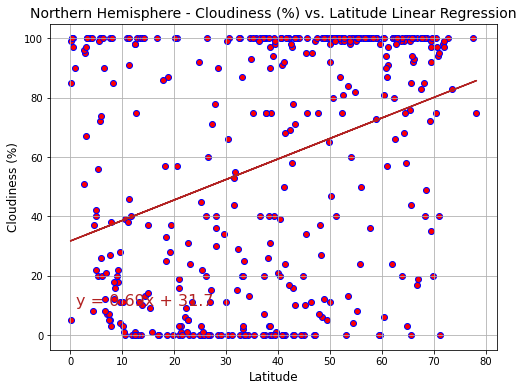

In [38]:
#create scatter plot
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_cloudiness, marker="o", facecolors="red", edgecolors="blue")

# call linear regression plot function to retrieve plot and line equation (for annotation)
ax, line_eq = plot_linear_regression(north_latitudes, north_cloudiness, ax)

#add labels, title, limits & grid
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

#annotate the linear regression line equation on the plot
plt.annotate(line_eq,(1,10),fontsize=16,color="firebrick")

#display and save the plot
plt.savefig("../Images/northern-latitude-vs-cloudiness-linreg.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.1903176699356142


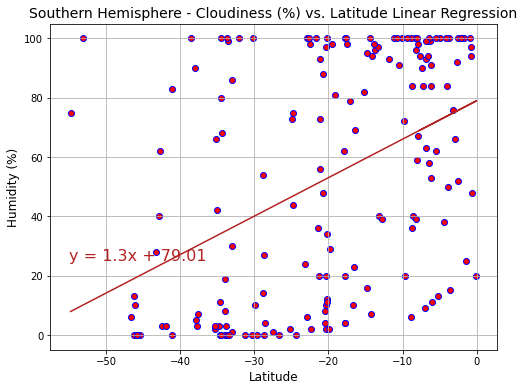

In [39]:
#create scatter plot 
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_cloudiness, marker="o", facecolors="red", edgecolors="blue")

#call linear regression plot function to retrieve plot and line equation (for annotation)
ax, line_eq = plot_linear_regression(south_latitudes, south_cloudiness, ax)

# add labels, title, limits & grid
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

#annotate the linear regression line equation on the plot
plt.annotate(line_eq,(-55, 25),fontsize=16,color="firebrick")

# display and save the plot 
plt.savefig("../Images/southern-latitude-vs-cloudiness-linreg.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.023328661227216416


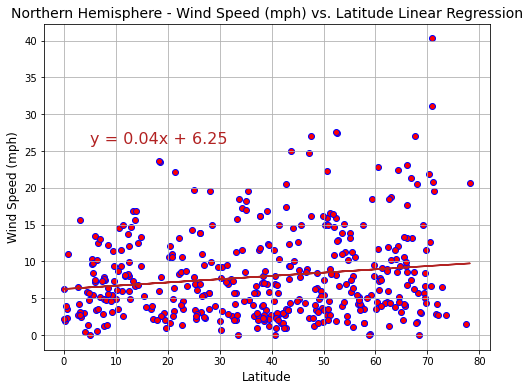

In [40]:
#create scatter plot
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_windspeed, marker="o", facecolors="red", edgecolors="blue")

#call linear regression plot function to retrieve plot and line equation (for annotation)
ax, line_eq = plot_linear_regression(north_latitudes, north_windspeed, ax)

#add labels, title, limits & grid
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

#annotate the linear regression line equation on the plot
plt.annotate(line_eq,(5,26),fontsize=16,color="firebrick")

#display and save the plot
plt.savefig("../Images/northern-latitude-vs-windspeed-linreg.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.12607486784266447


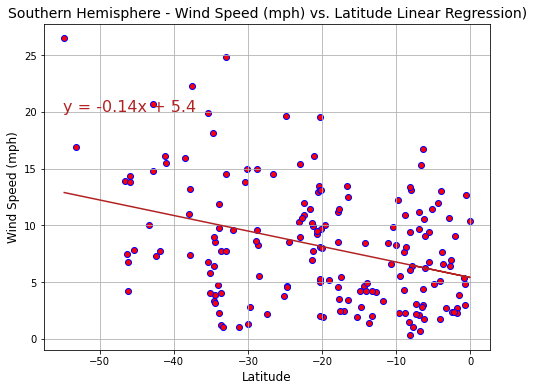

In [41]:
#create scatter plot
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_windspeed, marker="o", facecolors="red", edgecolors="blue")

#call linear regression plot function to retrieve plot and line equation (for annotation)
ax, line_eq = plot_linear_regression(south_latitudes, south_windspeed, ax)

#add labels, title, limits & grid 
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression)", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

#annotate the linear regression line equation on the plot
plt.annotate(line_eq,(-55, 20),fontsize=16,color="firebrick")

# display and save the plot
plt.savefig("../Images/southern-latitude-vs-windspeed-linreg.png")
plt.show()